In [1]:
import pandas as pd
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
from statsmodels.tsa.arima_model import ARIMA
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
modelList=list()
cropList=list()
marketList=list()

C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
trainog=pd.read_excel('CropPricesComplete.xlsx')
crops=trainog['crop/commodity'].unique()
print(crops)
def test_stationarity(x):
    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
#     Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        

['Rice' 'Sesamum' 'Soyabean' 'Safflower' 'Mustard' 'Arhar Dal' 'Bajra'
 'Jowar' 'Maize' 'Wheat' 'Sunflower' 'Groundnut' 'Moong']


For crop Rice
['Alibagh' 'Baramati' 'Barshi' 'Bhandara' 'Bhivandi' 'Bhor' 'Karjat'
 'Mangaon' 'Mumbai' 'Murud' 'Palghar' 'Pen' 'Solapur' 'Tumsar' 'Ulhasnagar'
 'Umared' 'Vasai' 'Nagpur' 'Lasalgaon' 'Kolhapur(Laxmipuri)' 'Lakhandur'
 'Navapur' 'Nira(Saswad)' 'Sangli' 'Aheri' 'Pavani' 'Pune' 'Nandurbar'
 'Chalisgaon' 'Bhokar' 'Palthan' 'Ramtek' 'Akola' 'Indapur(Bhigwan)'
 'Shrirampur' 'Achalpur' 'Ahmedpur' 'Akot' 'Amalner' 'Amarawati' 'Chopada'
 'Kalamb(Osmanabad)' 'Khamgaon' 'Nandura' 'Pachora' 'Shegaon' 'Shirpur'
 'Washim' 'Dharni' 'Latur' 'Dharmabad' 'Yawal' 'Buldhana(Dhad)' 'Mantha'
 'Jalgaon' 'Balapur' 'Jalgaon Jamod(Aasalgaon)' 'Kaij' 'Kille Dharur'
 'Umarga' 'Aarni' 'Ahmednagar' 'Akhadabalapur' 'Akole' 'Ambad (Vadigodri)'
 'Ambejaogai' 'Anajngaon' 'Arvi' 'Ashti(Karanja)' 'Aurad Shahajani'
 'Aurangabad' 'Ausa' 'Babhulgaon' 'Basmat' 'Bhiwapur' 'Bhokardan'
 'Bhokardan(Pimpalgaon Renu)' 'Bori Arab' 'Buldhana' 'Chakur' 'Chandrapur'
 'Chandur Bazar' 'Chandur Railway' 'Chikali' 'Chimur' 

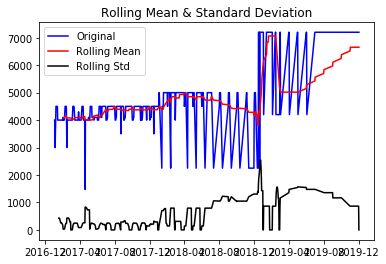

ADF Stastistic: -1.954493
p-value: 0.306876
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


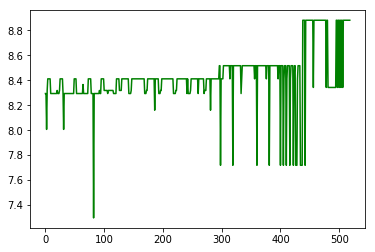

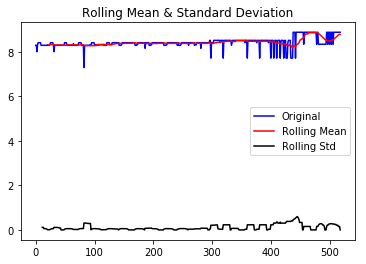

ADF Stastistic: -3.286717
p-value: 0.015483
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


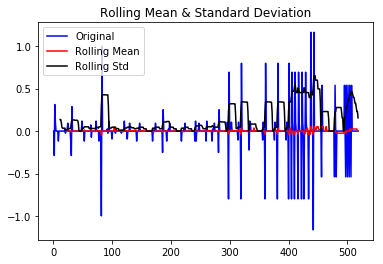

ADF Stastistic: -7.266292
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.444 
	5%: -2.867 
	10%: -2.570 


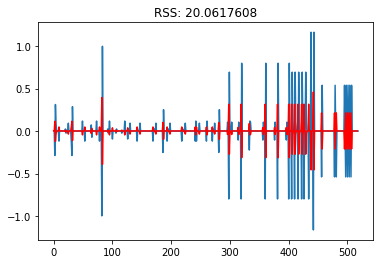

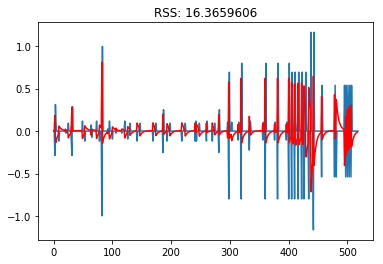

Rice Baramati
220


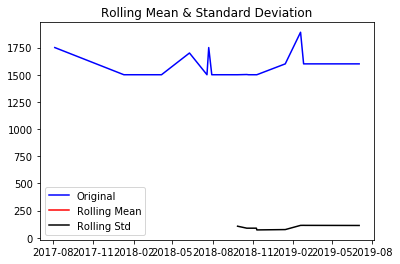

ADF Stastistic: -4.399346
p-value: 0.000298
The graph is stationery
Critical values:
	1%: -3.788 
	5%: -3.013 
	10%: -2.646 


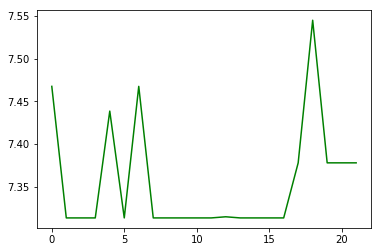

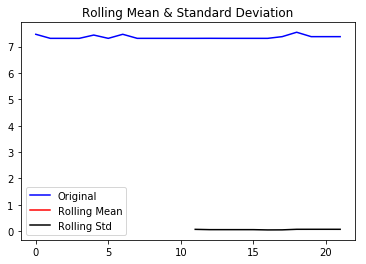

ADF Stastistic: -4.365177
p-value: 0.000342
The graph is stationery
Critical values:
	1%: -3.788 
	5%: -3.013 
	10%: -2.646 


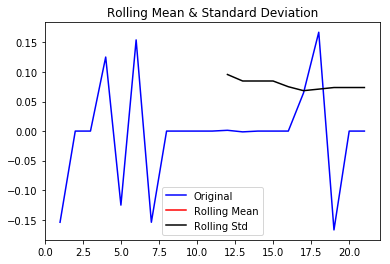

ADF Stastistic: 0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.223 
	5%: -3.189 
	10%: -2.730 


C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


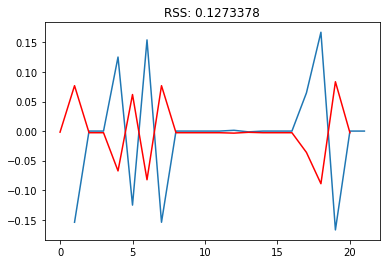

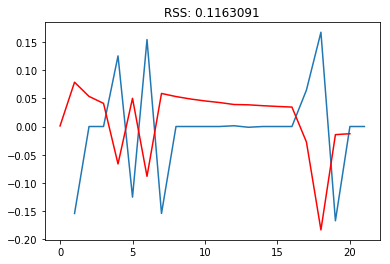

Rice Barshi
210


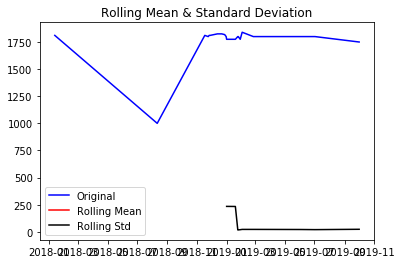

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.223 
	5%: -3.189 
	10%: -2.730 


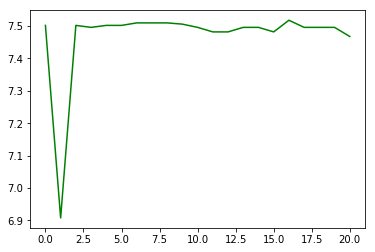

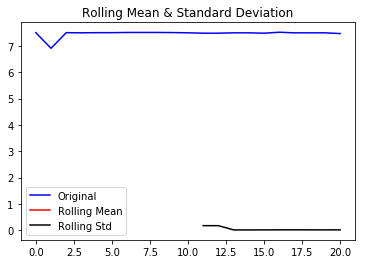

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.223 
	5%: -3.189 
	10%: -2.730 


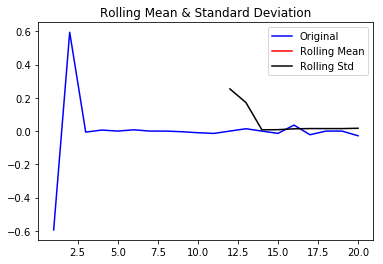

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


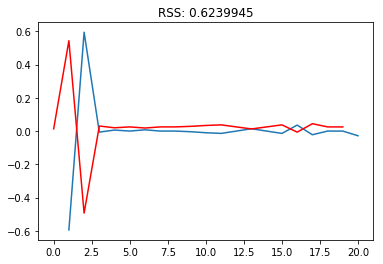

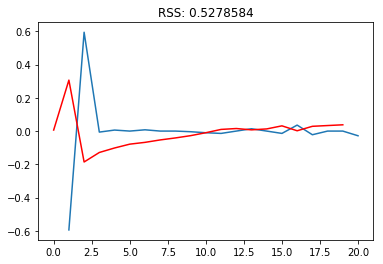

Rice Bhandara
1210


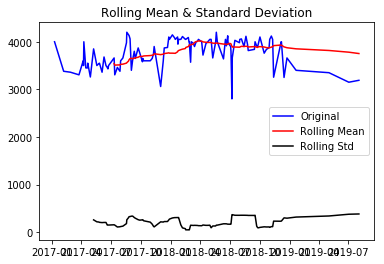

ADF Stastistic: -5.867191
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.486 
	5%: -2.886 
	10%: -2.580 


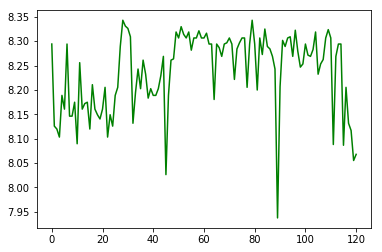

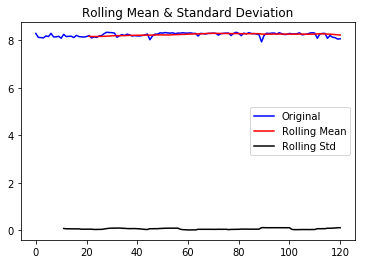

ADF Stastistic: -6.048056
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.486 
	5%: -2.886 
	10%: -2.580 


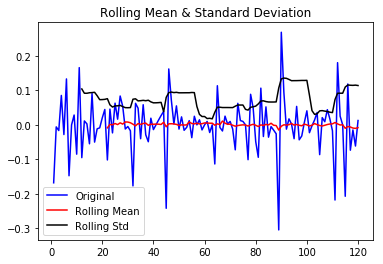

ADF Stastistic: -9.608821
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.488 
	5%: -2.887 
	10%: -2.580 


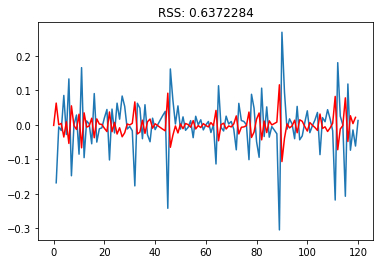

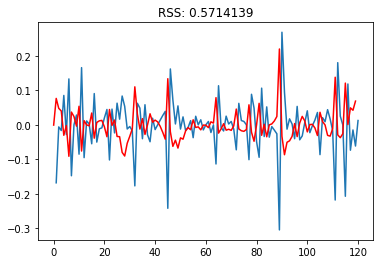

Rice Bhivandi
4820


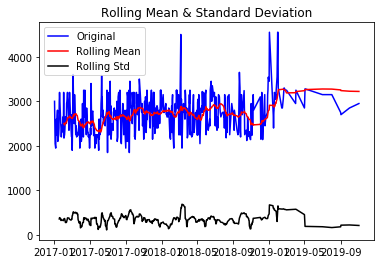

ADF Stastistic: -5.377248
p-value: 0.000004
The graph is stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


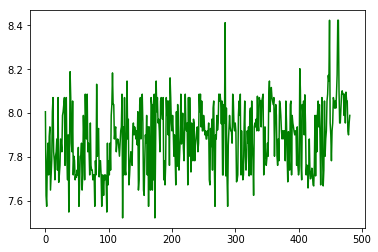

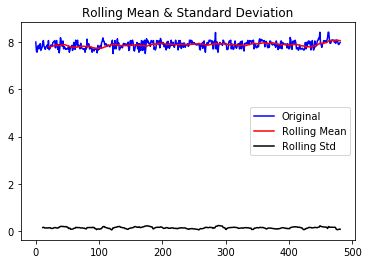

ADF Stastistic: -5.379589
p-value: 0.000004
The graph is stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


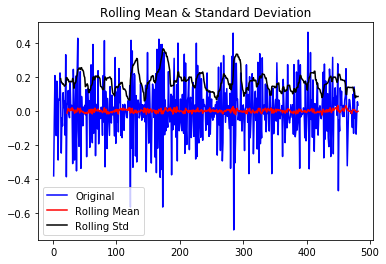

ADF Stastistic: -9.632763
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


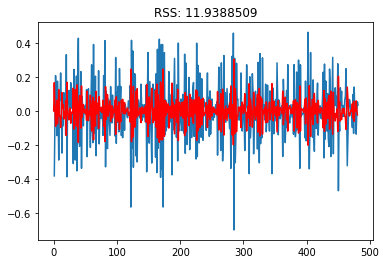

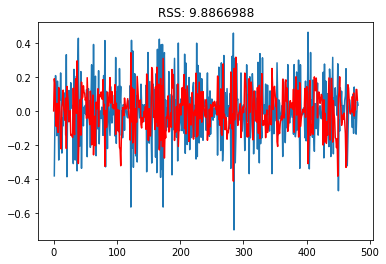

Rice Bhor
220


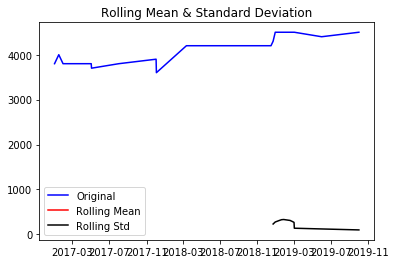

ADF Stastistic: -0.840319
p-value: 0.806991
The graph is non stationery
Critical values:
	1%: -4.138 
	5%: -3.155 
	10%: -2.714 


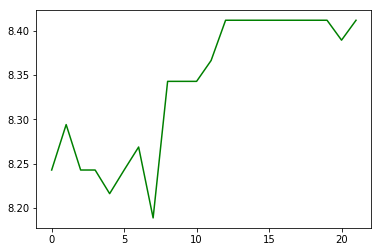

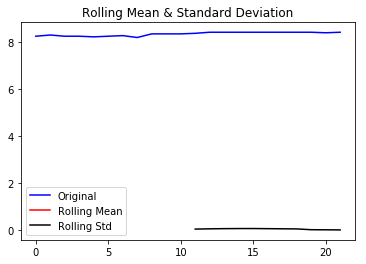

ADF Stastistic: -1.067936
p-value: 0.727688
The graph is non stationery
Critical values:
	1%: -4.138 
	5%: -3.155 
	10%: -2.714 


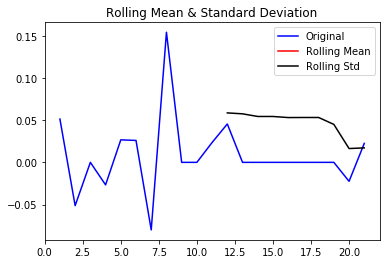

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.223 
	5%: -3.189 
	10%: -2.730 


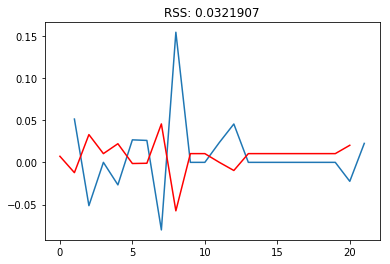

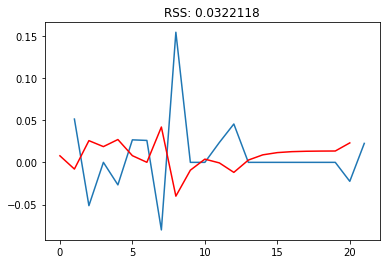

Rice Karjat
5530


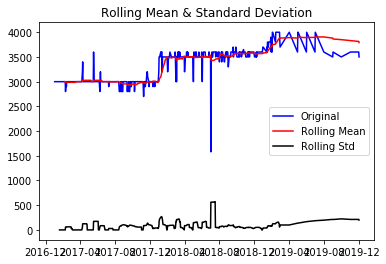

ADF Stastistic: -1.473522
p-value: 0.546566
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


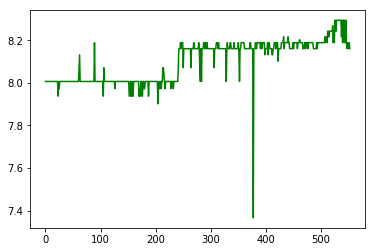

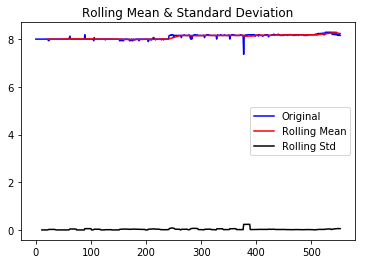

ADF Stastistic: -1.473581
p-value: 0.546537
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


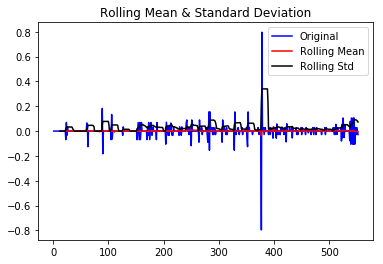

ADF Stastistic: -11.071586
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


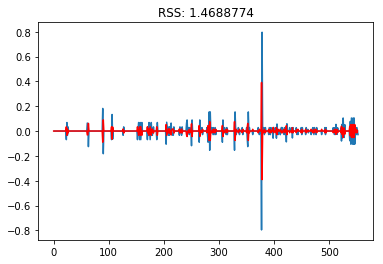

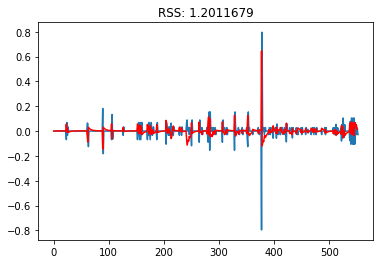

Rice Mangaon
4430


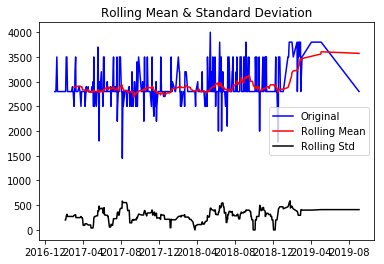

ADF Stastistic: -4.131826
p-value: 0.000858
The graph is stationery
Critical values:
	1%: -3.445 
	5%: -2.868 
	10%: -2.570 


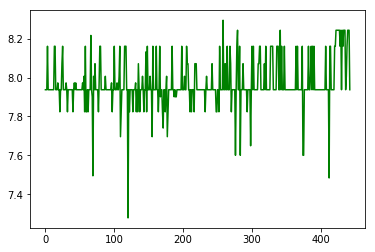

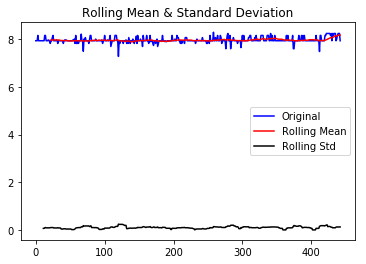

ADF Stastistic: -4.433759
p-value: 0.000259
The graph is stationery
Critical values:
	1%: -3.445 
	5%: -2.868 
	10%: -2.570 


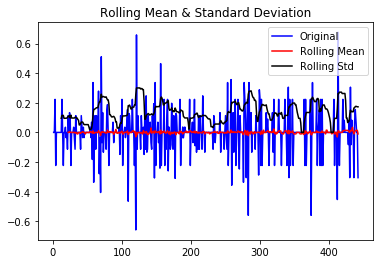

ADF Stastistic: -12.314042
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.446 
	5%: -2.868 
	10%: -2.570 


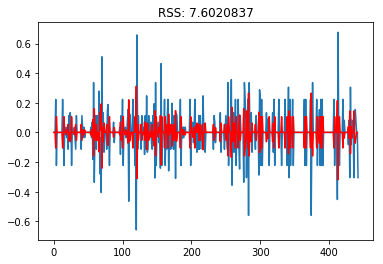

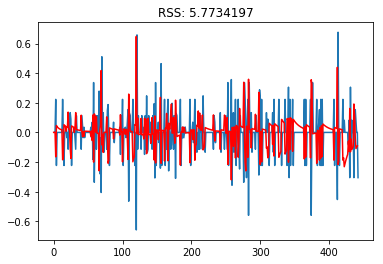

Rice Mumbai
460


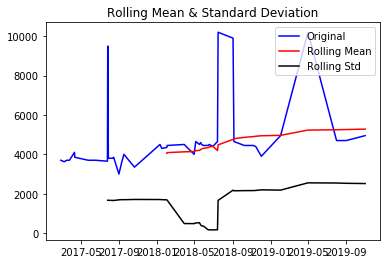

ADF Stastistic: -4.927758
p-value: 0.000031
The graph is stationery
Critical values:
	1%: -3.585 
	5%: -2.928 
	10%: -2.602 


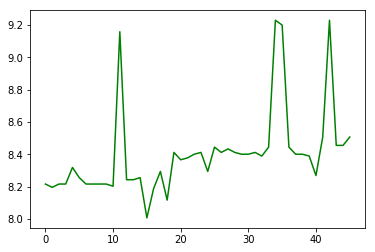

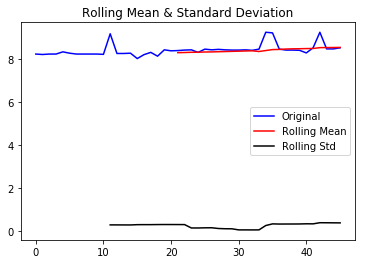

ADF Stastistic: -4.637535
p-value: 0.000110
The graph is stationery
Critical values:
	1%: -3.585 
	5%: -2.928 
	10%: -2.602 


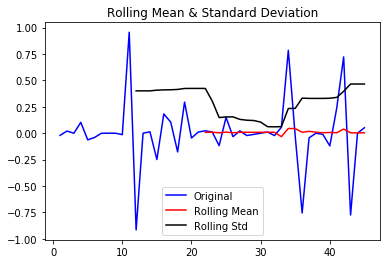

ADF Stastistic: -4.867431
p-value: 0.000040
The graph is stationery
Critical values:
	1%: -3.616 
	5%: -2.941 
	10%: -2.609 


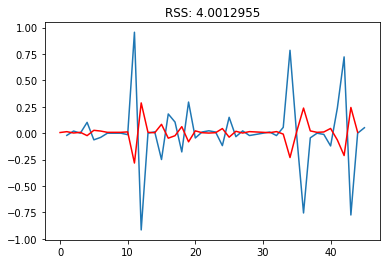

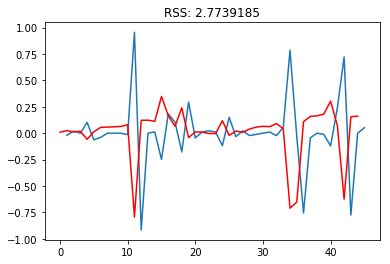

Rice Murud
4910


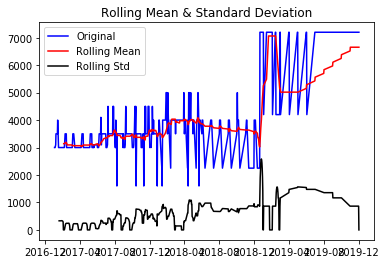

ADF Stastistic: -2.049428
p-value: 0.265329
The graph is non stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


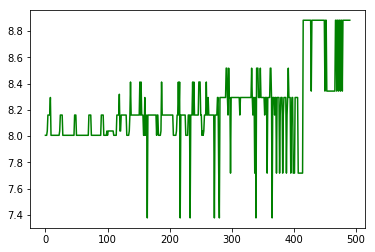

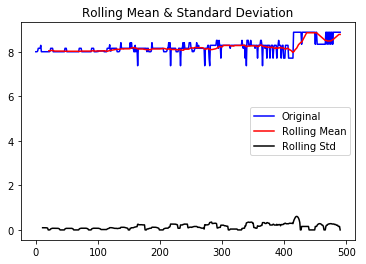

ADF Stastistic: -2.814741
p-value: 0.056199
The graph is non stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


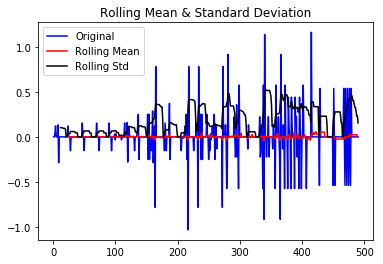

ADF Stastistic: -12.005317
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.444 
	5%: -2.868 
	10%: -2.570 


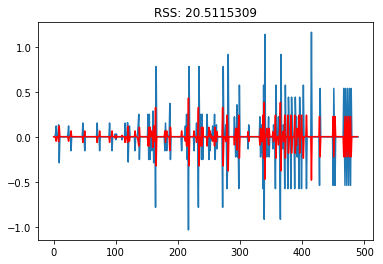

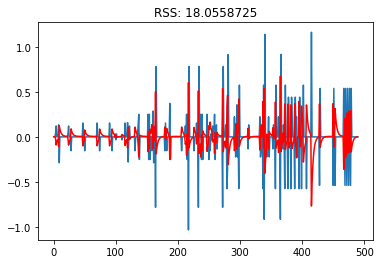

Rice Palghar
5830


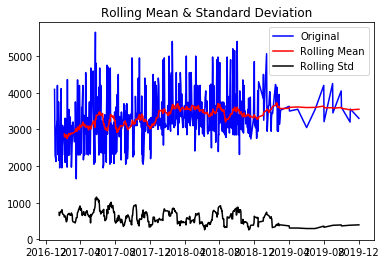

ADF Stastistic: -9.605867
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


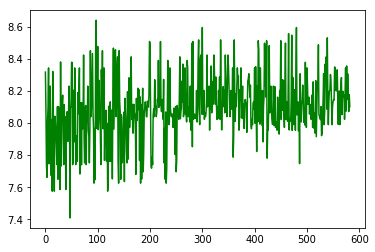

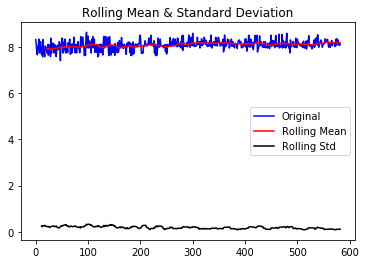

ADF Stastistic: -5.364738
p-value: 0.000004
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


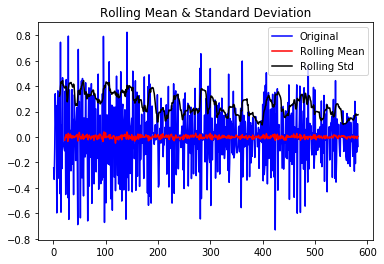

ADF Stastistic: -9.727290
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


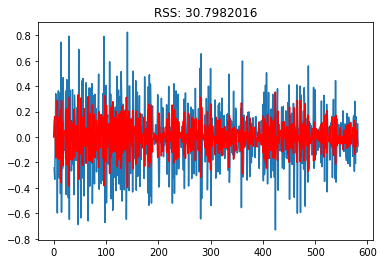

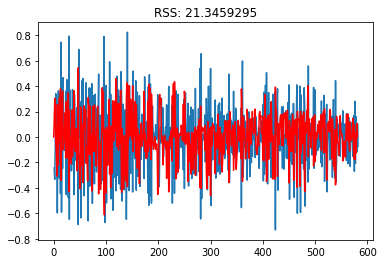

Rice Pen
5550


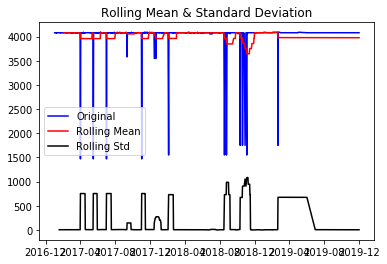

ADF Stastistic: -9.141118
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


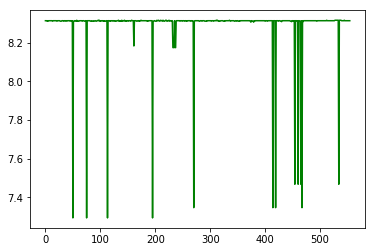

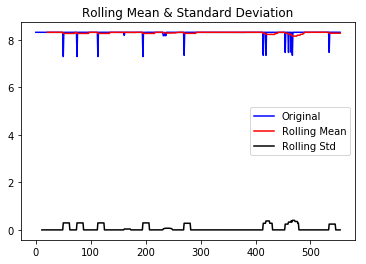

ADF Stastistic: -9.239355
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


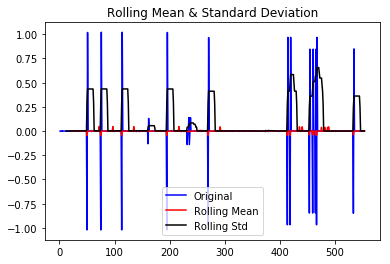

ADF Stastistic: -11.168482
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


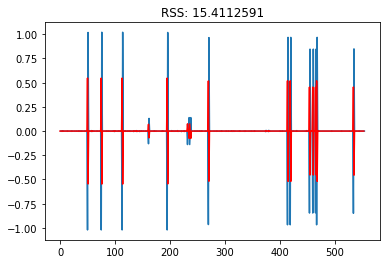

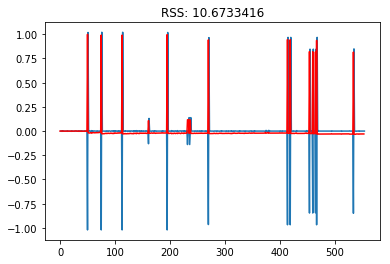

Rice Solapur
5840


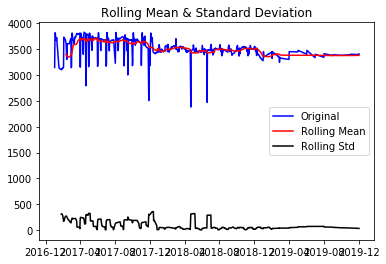

ADF Stastistic: -2.886915
p-value: 0.046891
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


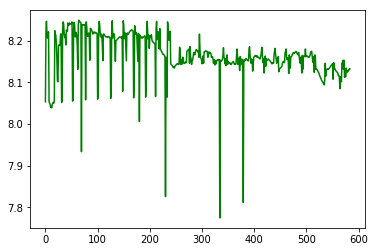

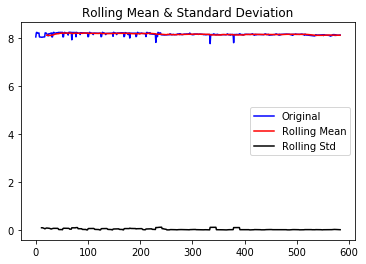

ADF Stastistic: -3.112280
p-value: 0.025658
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


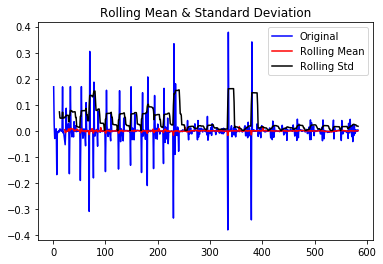

ADF Stastistic: -11.821896
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


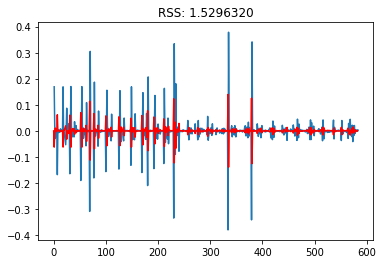

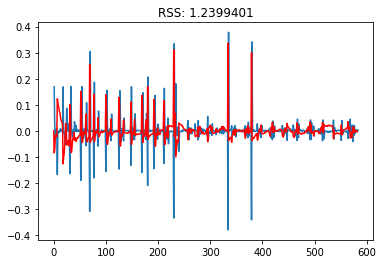

Rice Tumsar
4090


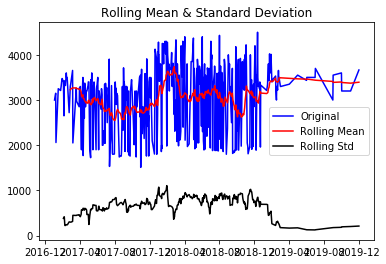

ADF Stastistic: -16.188489
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.446 
	5%: -2.869 
	10%: -2.571 


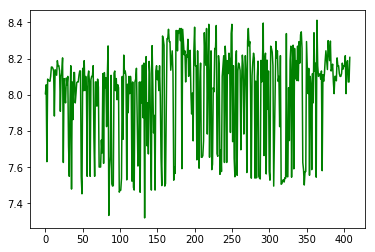

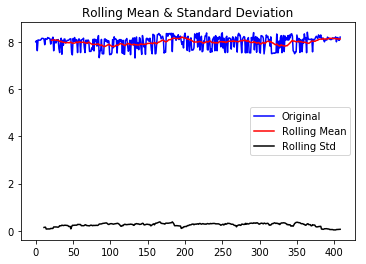

ADF Stastistic: -16.236901
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.446 
	5%: -2.869 
	10%: -2.571 


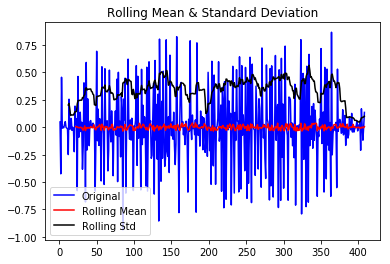

ADF Stastistic: -10.463769
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.447 
	5%: -2.869 
	10%: -2.571 


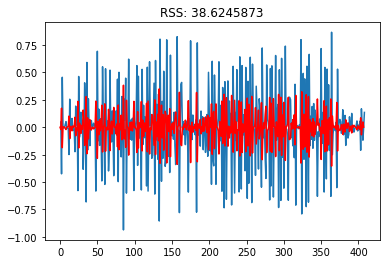

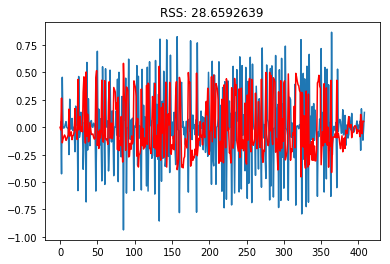

Rice Ulhasnagar
2740


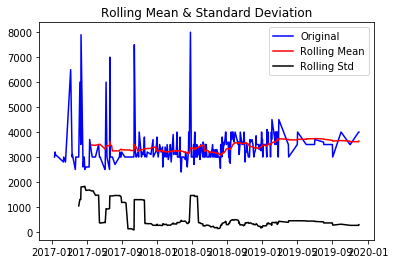

ADF Stastistic: -16.791704
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.455 
	5%: -2.872 
	10%: -2.572 


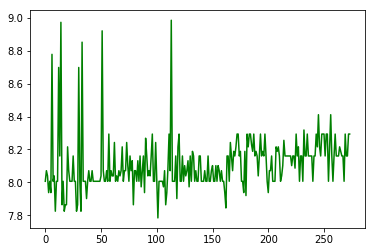

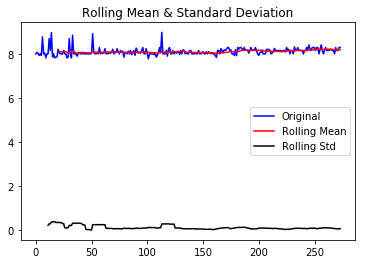

ADF Stastistic: -8.288877
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.455 
	5%: -2.872 
	10%: -2.572 


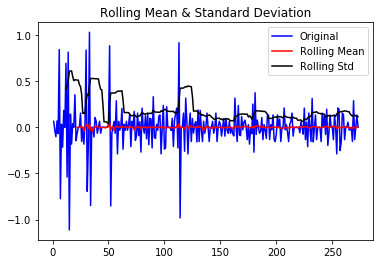

ADF Stastistic: -7.710668
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.456 
	5%: -2.873 
	10%: -2.573 


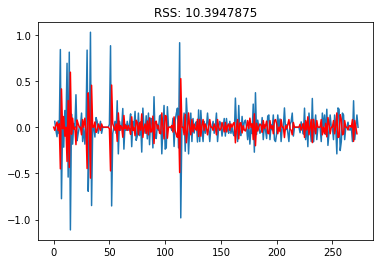

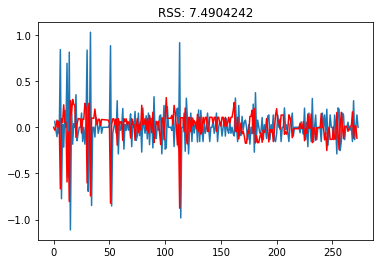

Rice Umared
1860


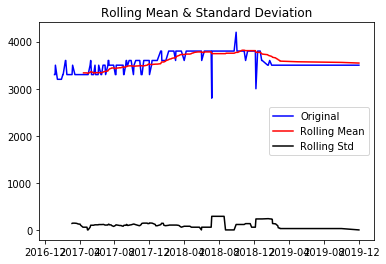

ADF Stastistic: -1.964849
p-value: 0.302195
The graph is non stationery
Critical values:
	1%: -3.467 
	5%: -2.878 
	10%: -2.575 


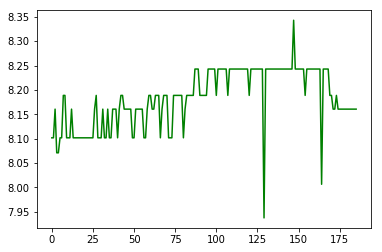

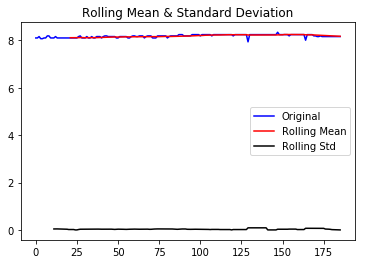

ADF Stastistic: -2.029478
p-value: 0.273800
The graph is non stationery
Critical values:
	1%: -3.467 
	5%: -2.878 
	10%: -2.575 


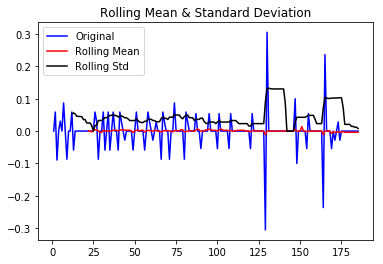

ADF Stastistic: -7.763364
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.468 
	5%: -2.878 
	10%: -2.576 


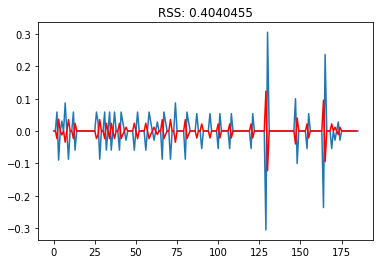

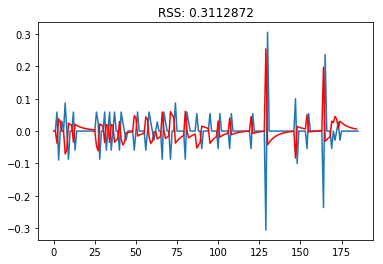

Rice Vasai
5590


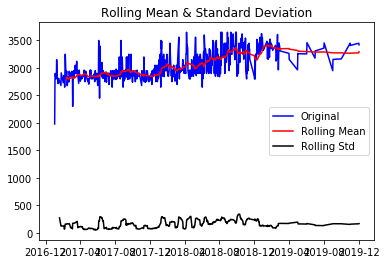

ADF Stastistic: -1.484409
p-value: 0.541209
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


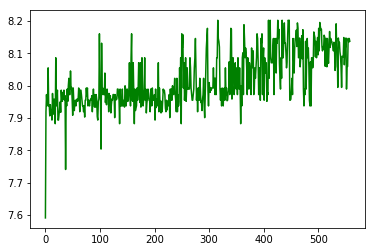

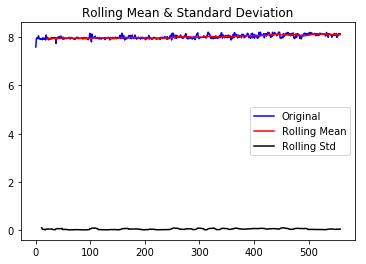

ADF Stastistic: -1.483977
p-value: 0.541422
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


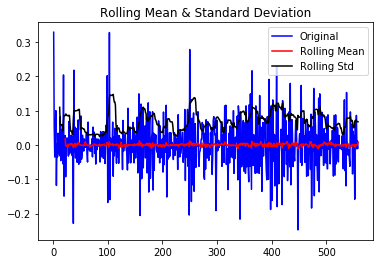

ADF Stastistic: -9.456570
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


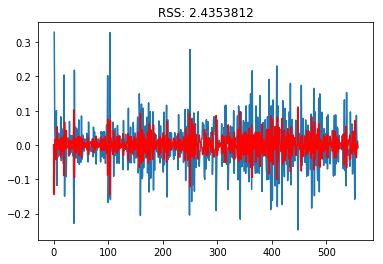

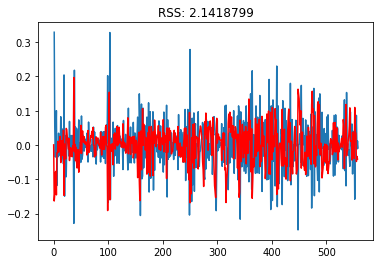

Rice Nagpur
90
Rice Lasalgaon
30
Rice Kolhapur(Laxmipuri)
3490


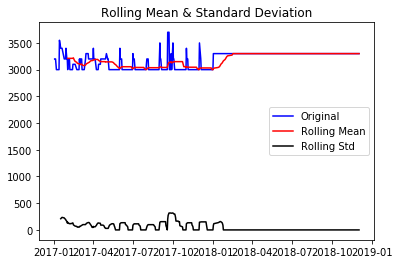

ADF Stastistic: -3.886317
p-value: 0.002138
The graph is stationery
Critical values:
	1%: -3.450 
	5%: -2.870 
	10%: -2.571 


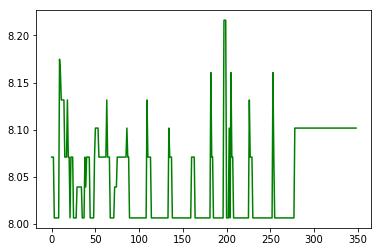

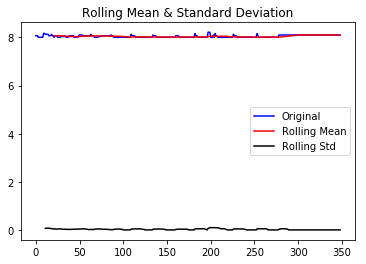

ADF Stastistic: -3.844036
p-value: 0.002488
The graph is stationery
Critical values:
	1%: -3.450 
	5%: -2.870 
	10%: -2.571 


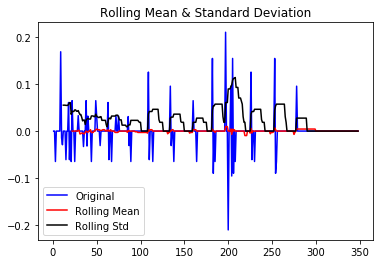

ADF Stastistic: -10.851580
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.450 
	5%: -2.870 
	10%: -2.571 


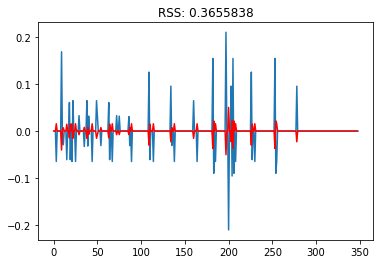

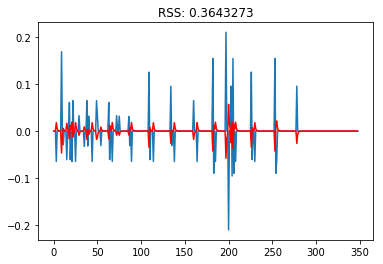

Rice Lakhandur
1730


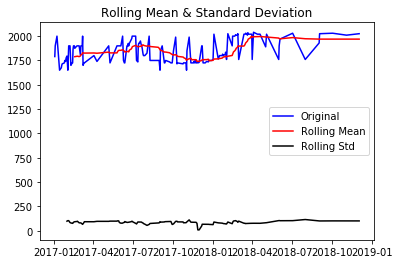

ADF Stastistic: -1.298353
p-value: 0.629925
The graph is non stationery
Critical values:
	1%: -3.471 
	5%: -2.880 
	10%: -2.576 


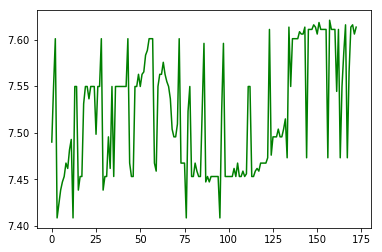

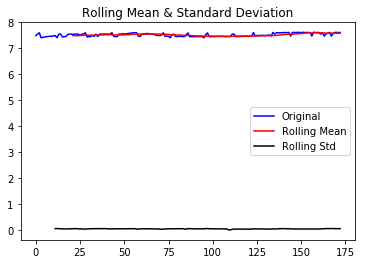

ADF Stastistic: -1.327154
p-value: 0.616660
The graph is non stationery
Critical values:
	1%: -3.471 
	5%: -2.880 
	10%: -2.576 


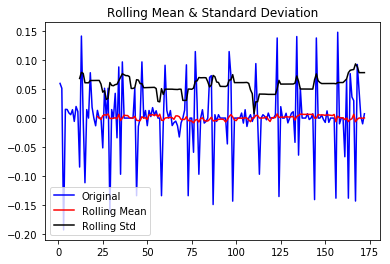

ADF Stastistic: -6.713073
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.471 
	5%: -2.880 
	10%: -2.576 


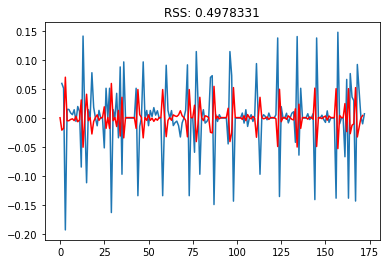

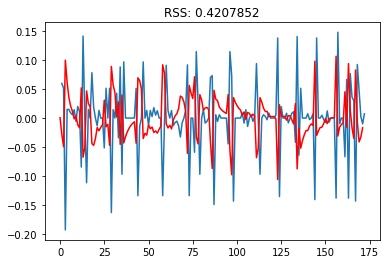

Rice Navapur
280


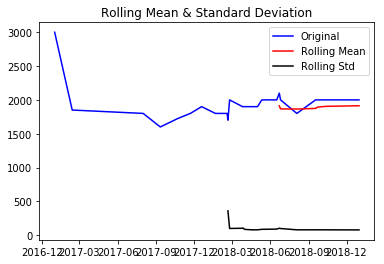

ADF Stastistic: -9.729512
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.700 
	5%: -2.976 
	10%: -2.628 


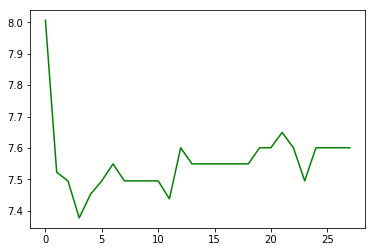

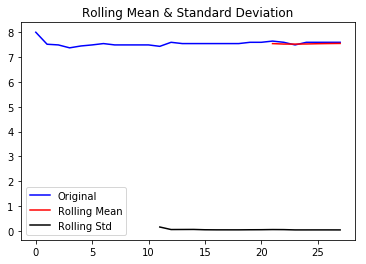

ADF Stastistic: -7.719127
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.700 
	5%: -2.976 
	10%: -2.628 


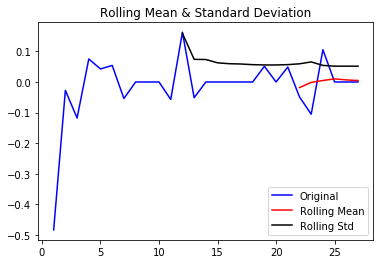

ADF Stastistic: -3.503355
p-value: 0.007901
The graph is non stationery
Critical values:
	1%: -3.809 
	5%: -3.022 
	10%: -2.651 


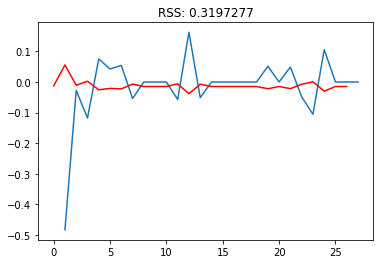

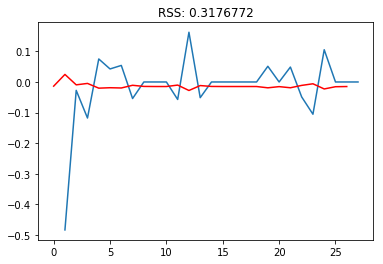

Rice Nira(Saswad)
520


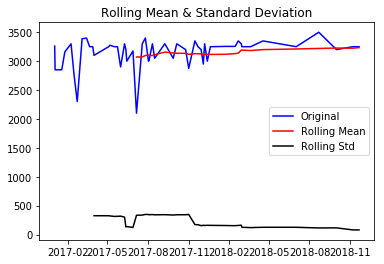

ADF Stastistic: -6.929135
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.566 
	5%: -2.920 
	10%: -2.598 


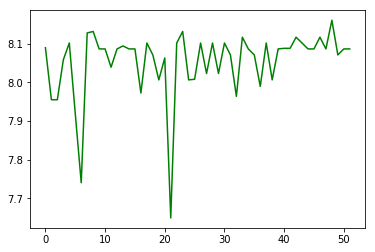

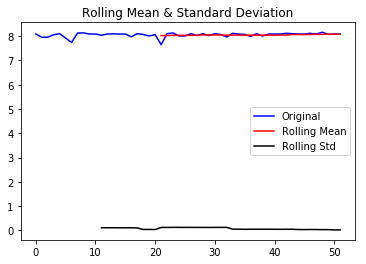

ADF Stastistic: -6.935193
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.566 
	5%: -2.920 
	10%: -2.598 


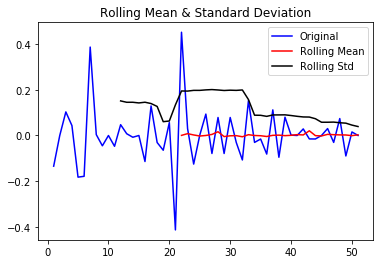

ADF Stastistic: -6.886488
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.578 
	5%: -2.925 
	10%: -2.601 


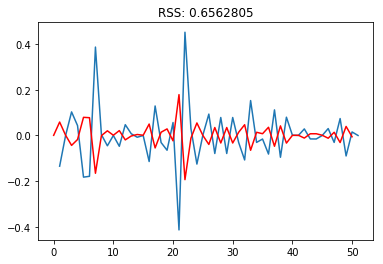

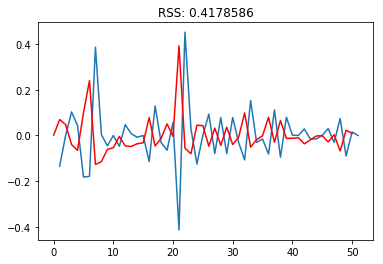

Rice Sangli
4080


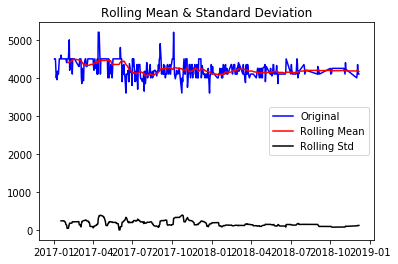

ADF Stastistic: -4.731109
p-value: 0.000074
The graph is stationery
Critical values:
	1%: -3.447 
	5%: -2.869 
	10%: -2.571 


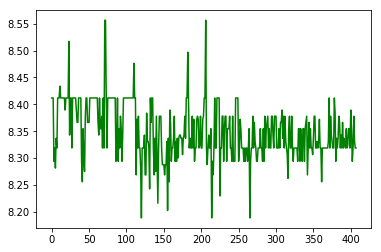

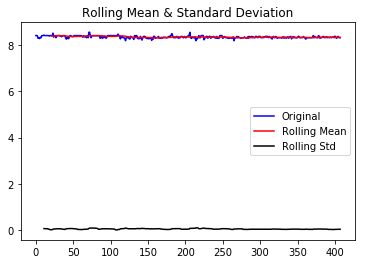

ADF Stastistic: -4.699160
p-value: 0.000084
The graph is stationery
Critical values:
	1%: -3.447 
	5%: -2.869 
	10%: -2.571 


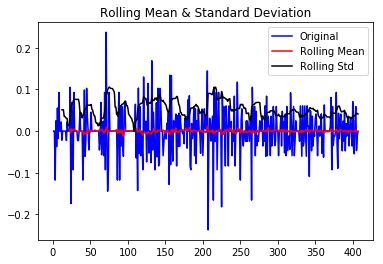

ADF Stastistic: -9.987712
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.447 
	5%: -2.869 
	10%: -2.571 


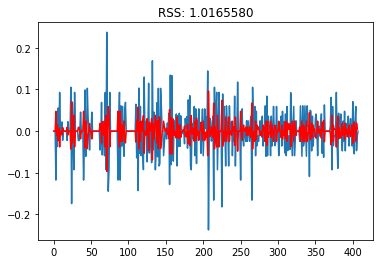

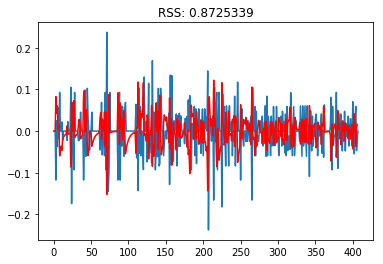

Rice Aheri
180


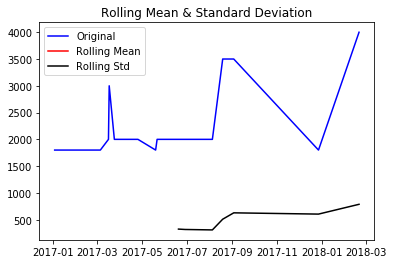

ADF Stastistic: 0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


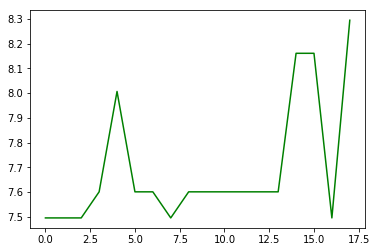

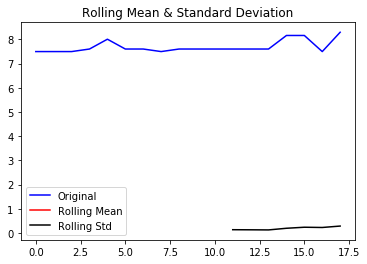

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


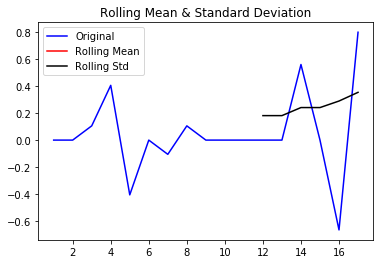

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.665 
	5%: -3.367 
	10%: -2.803 


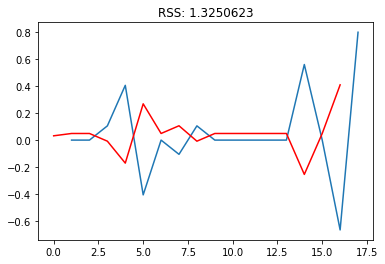

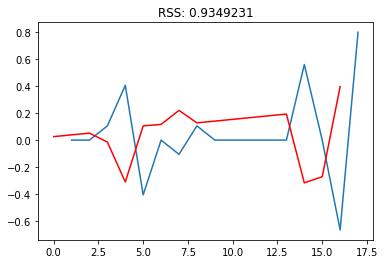

Rice Pavani
10
Rice Pune
50
Rice Nandurbar
60
Rice Chalisgaon
30
Rice Bhokar
10
Rice Palthan
30
Rice Ramtek
20
Rice Akola
270


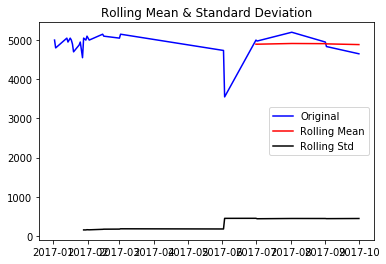

ADF Stastistic: -4.871402
p-value: 0.000040
The graph is stationery
Critical values:
	1%: -3.859 
	5%: -3.042 
	10%: -2.661 


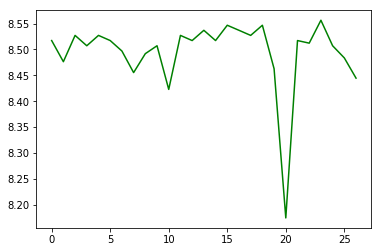

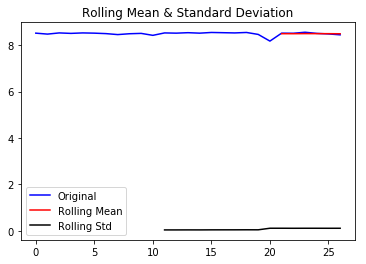

ADF Stastistic: -5.264239
p-value: 0.000006
The graph is stationery
Critical values:
	1%: -3.859 
	5%: -3.042 
	10%: -2.661 


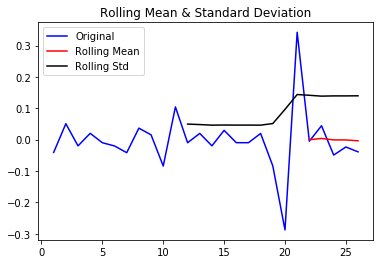

ADF Stastistic: -4.315672
p-value: 0.000417
The graph is stationery
Critical values:
	1%: -3.889 
	5%: -3.054 
	10%: -2.667 


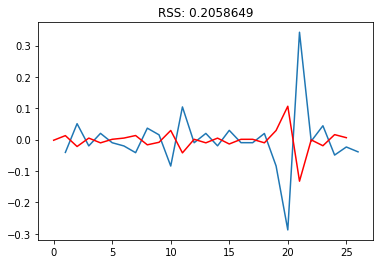

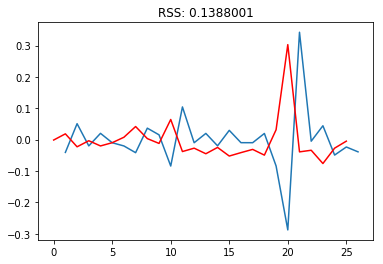

Rice Indapur(Bhigwan)
130


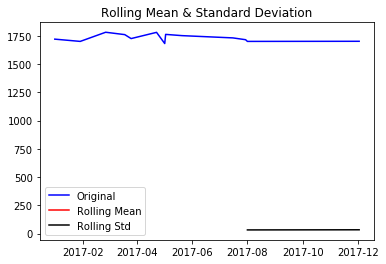

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -6.045 
	5%: -3.929 
	10%: -2.987 


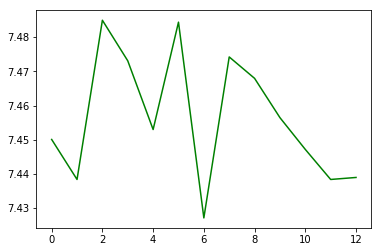

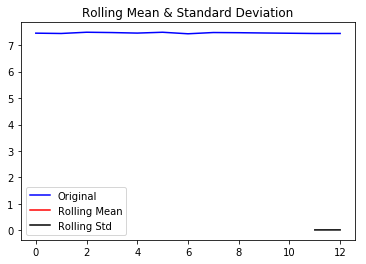

ADF Stastistic: -0.090027
p-value: 0.950423
The graph is non stationery
Critical values:
	1%: -4.665 
	5%: -3.367 
	10%: -2.803 


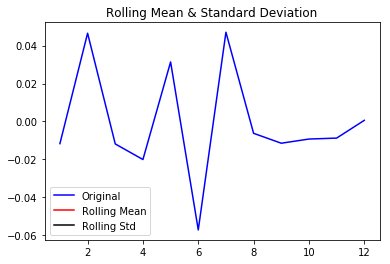

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -7.355 
	5%: -4.474 
	10%: -3.127 


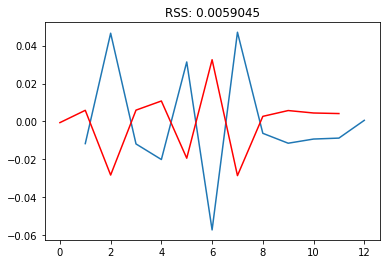

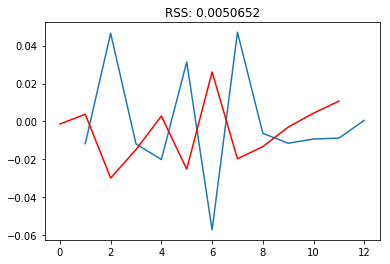

Rice Shrirampur
20
Rice Achalpur
0
Rice Ahmedpur
0
Rice Akot
0
Rice Amalner
0
Rice Amarawati
0
Rice Chopada
0
Rice Kalamb(Osmanabad)
0
Rice Khamgaon
0
Rice Nandura
0
Rice Pachora
0
Rice Shegaon
0
Rice Shirpur
0
Rice Washim
0
Rice Dharni
0
Rice Latur
0
Rice Dharmabad
0
Rice Yawal
0
Rice Buldhana(Dhad)
0
Rice Mantha
0
Rice Jalgaon
0
Rice Balapur
0
Rice Jalgaon Jamod(Aasalgaon)
0
Rice Kaij
0
Rice Kille Dharur
0
Rice Umarga
0
Rice Aarni
0
Rice Ahmednagar
0
Rice Akhadabalapur
0
Rice Akole
0
Rice Ambad (Vadigodri)
0
Rice Ambejaogai
0
Rice Anajngaon
0
Rice Arvi
0
Rice Ashti(Karanja)
0
Rice Aurad Shahajani
0
Rice Aurangabad
0
Rice Ausa
0
Rice Babhulgaon
0
Rice Basmat
0
Rice Bhiwapur
0
Rice Bhokardan
0
Rice Bhokardan(Pimpalgaon Renu)
0
Rice Bori Arab
0
Rice Buldhana
0
Rice Chakur
0
Rice Chandrapur
0
Rice Chandur Bazar
0
Rice Chandur Railway
0
Rice Chikali
0
Rice Chimur
0
Rice Daryapur
0
Rice Deoulgaon Raja
0
Rice Dhamngaon-Railway
0
Rice Dharangaon
0
Rice Dhule
0
Rice Digras
0
Rice Dondaicha
0


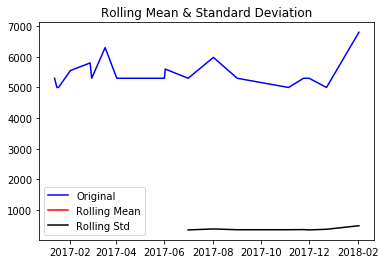

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


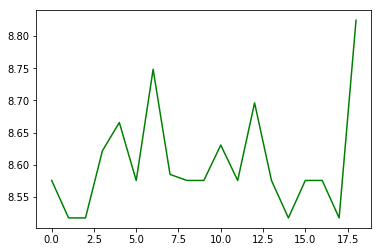

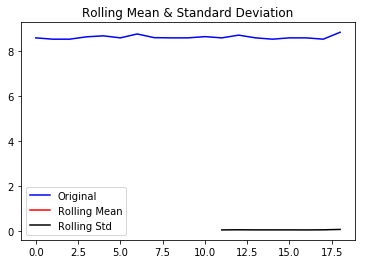

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


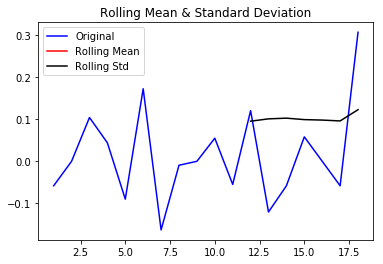

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


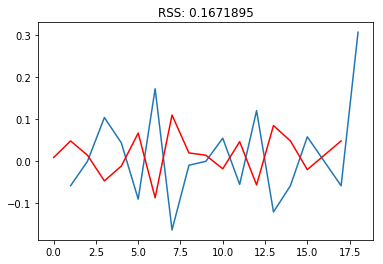

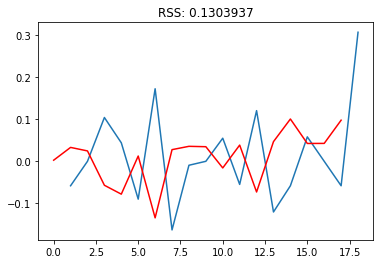

Sesamum Pavani
0
Sesamum Pune
0
Sesamum Nandurbar
0
Sesamum Chalisgaon
0
Sesamum Bhokar
680


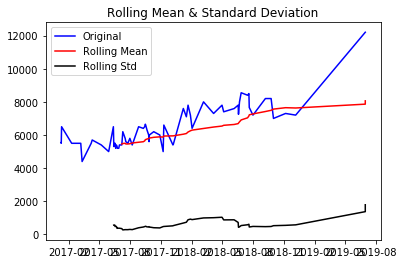

ADF Stastistic: 0.743472
p-value: 0.990667
The graph is non stationery
Critical values:
	1%: -3.539 
	5%: -2.909 
	10%: -2.592 


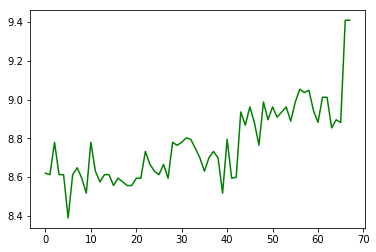

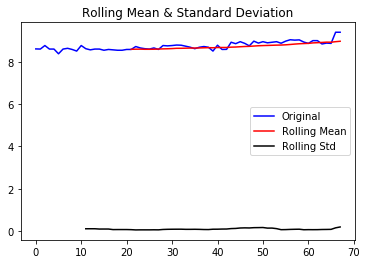

ADF Stastistic: 0.331710
p-value: 0.978753
The graph is non stationery
Critical values:
	1%: -3.539 
	5%: -2.909 
	10%: -2.592 


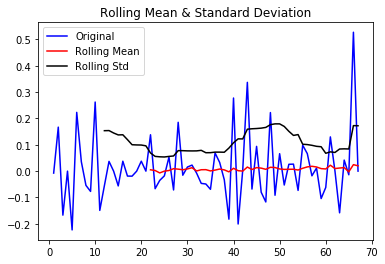

ADF Stastistic: -11.425935
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.534 
	5%: -2.906 
	10%: -2.591 


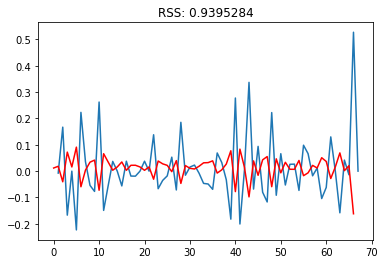

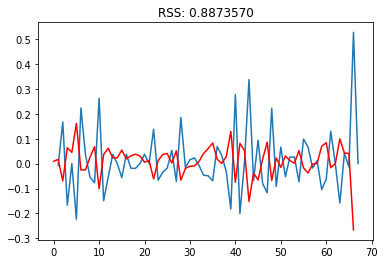

Sesamum Palthan
0
Sesamum Ramtek
0
Sesamum Akola
170


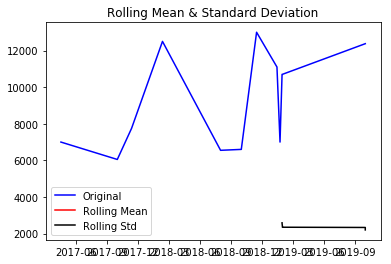

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


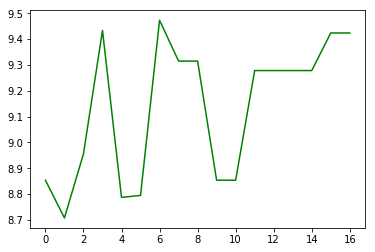

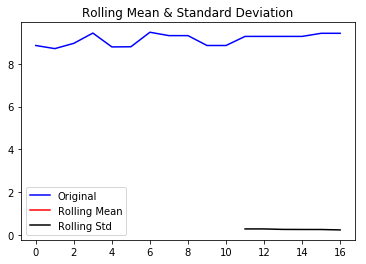

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


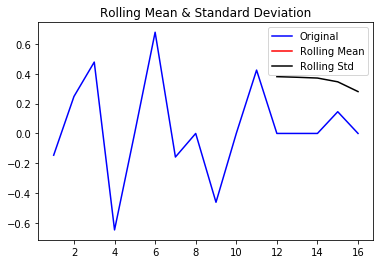

ADF Stastistic: -2.174990
p-value: 0.215448
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


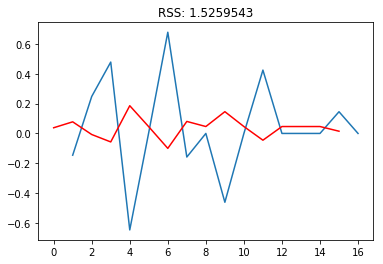

C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


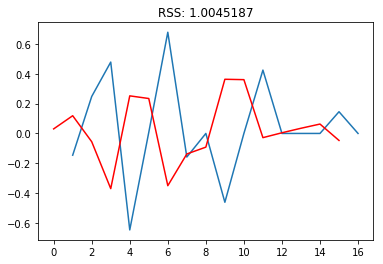

Sesamum Indapur(Bhigwan)
10
Sesamum Shrirampur
0
Sesamum Achalpur
10
Sesamum Ahmedpur
240


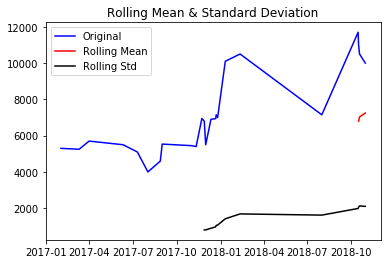

ADF Stastistic: 3.612806
p-value: 1.000000
The graph is non stationery
Critical values:
	1%: -3.889 
	5%: -3.054 
	10%: -2.667 


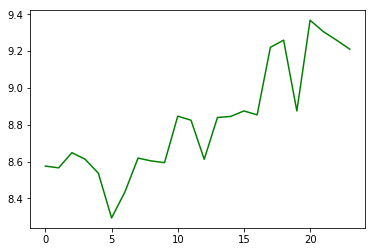

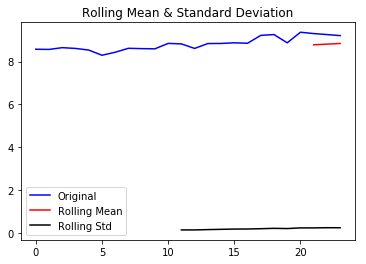

ADF Stastistic: 2.408247
p-value: 0.999014
The graph is non stationery
Critical values:
	1%: -3.889 
	5%: -3.054 
	10%: -2.667 


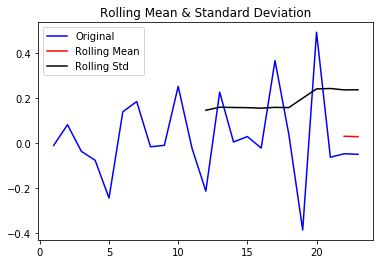

ADF Stastistic: -2.304497
p-value: 0.170522
The graph is non stationery
Critical values:
	1%: -3.924 
	5%: -3.068 
	10%: -2.674 


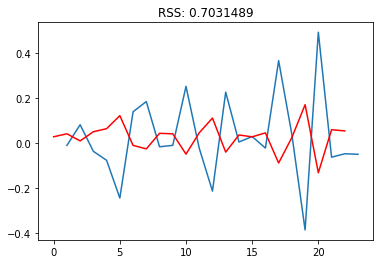

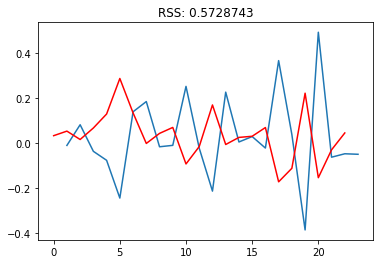

Sesamum Akot
190


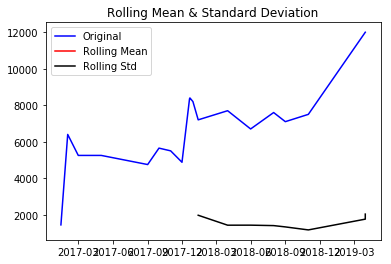

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


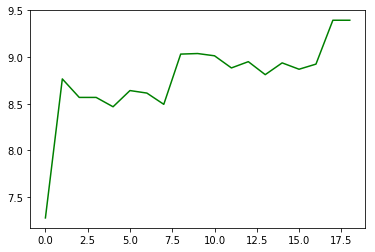

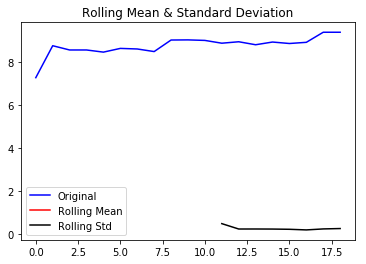

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.332 
	5%: -3.233 
	10%: -2.749 


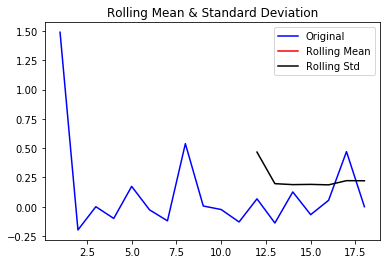

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


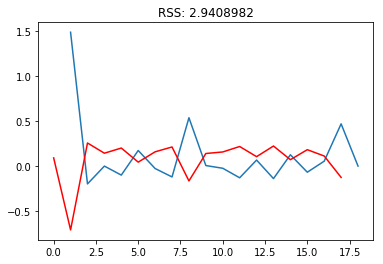

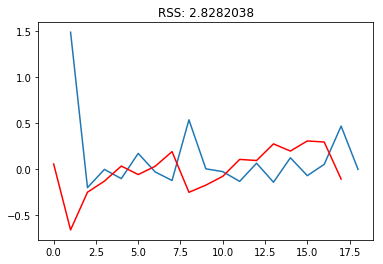

Sesamum Amalner
450


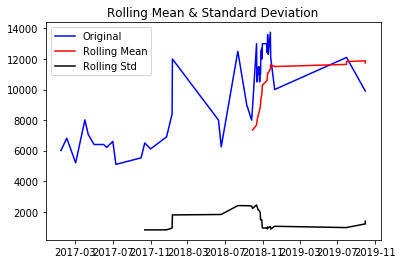

ADF Stastistic: -1.154315
p-value: 0.692933
The graph is non stationery
Critical values:
	1%: -3.601 
	5%: -2.935 
	10%: -2.606 


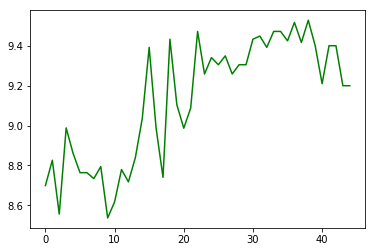

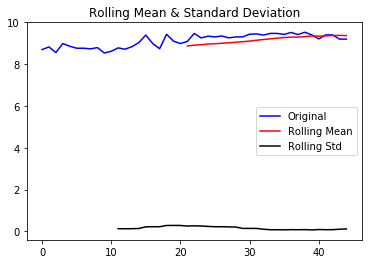

ADF Stastistic: -1.121182
p-value: 0.706551
The graph is non stationery
Critical values:
	1%: -3.601 
	5%: -2.935 
	10%: -2.606 


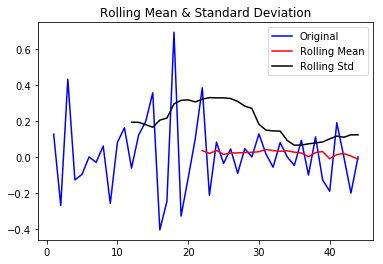

ADF Stastistic: -9.027608
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.597 
	5%: -2.933 
	10%: -2.605 


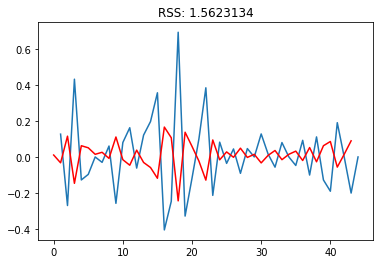

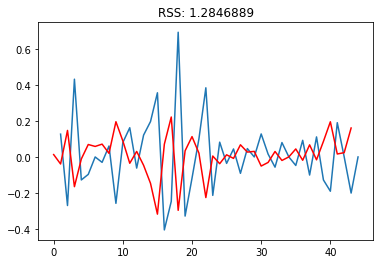

Sesamum Amarawati
270


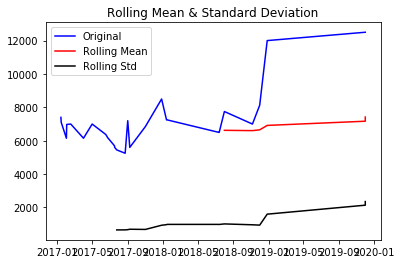

ADF Stastistic: 1.095427
p-value: 0.995177
The graph is non stationery
Critical values:
	1%: -3.889 
	5%: -3.054 
	10%: -2.667 


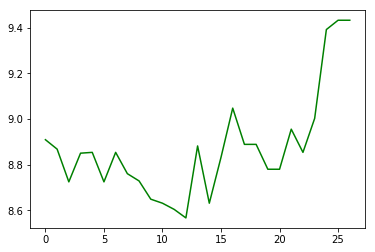

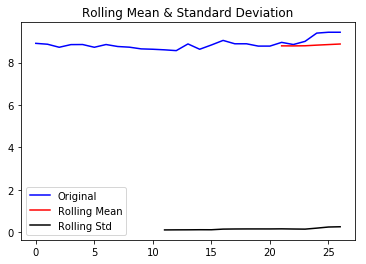

ADF Stastistic: -0.812182
p-value: 0.815517
The graph is non stationery
Critical values:
	1%: -3.711 
	5%: -2.981 
	10%: -2.630 


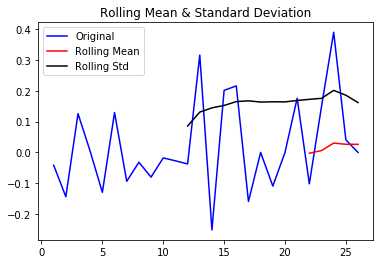

ADF Stastistic: -0.387655
p-value: 0.912140
The graph is non stationery
Critical values:
	1%: -3.924 
	5%: -3.068 
	10%: -2.674 


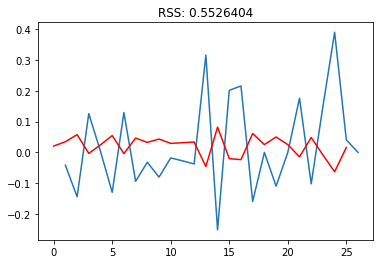

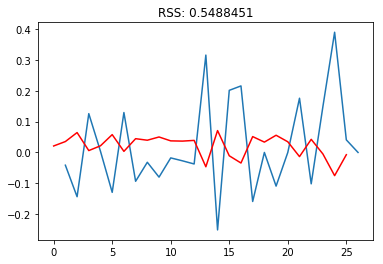

Sesamum Chopada
150


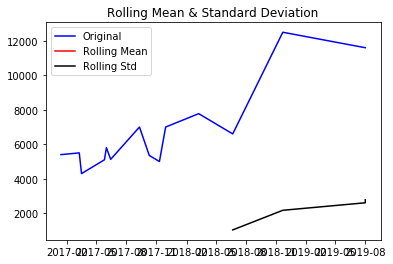

ADF Stastistic: 0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -5.354 
	5%: -3.646 
	10%: -2.901 


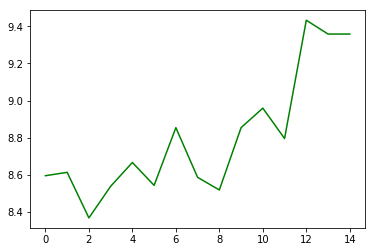

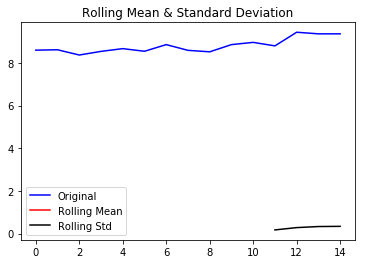

ADF Stastistic: 2.311635
p-value: 0.998962
The graph is non stationery
Critical values:
	1%: -4.473 
	5%: -3.290 
	10%: -2.772 


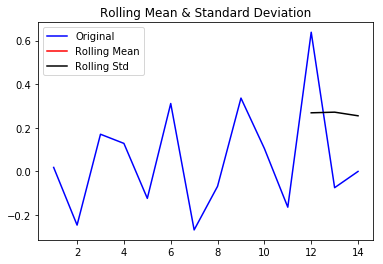

ADF Stastistic: 0.319086
p-value: 0.978203
The graph is non stationery
Critical values:
	1%: -4.665 
	5%: -3.367 
	10%: -2.803 


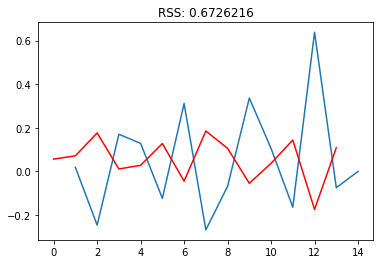

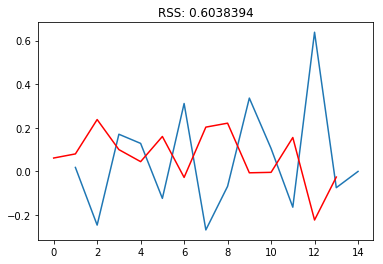

Sesamum Kalamb(Osmanabad)
40
Sesamum Khamgaon
380


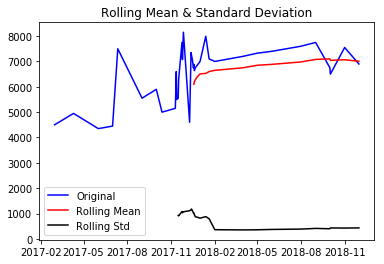

ADF Stastistic: -4.111142
p-value: 0.000928
The graph is stationery
Critical values:
	1%: -3.621 
	5%: -2.944 
	10%: -2.610 


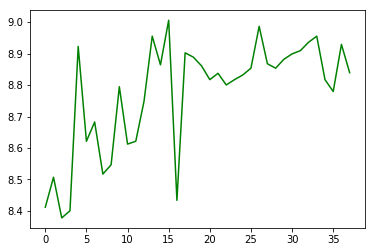

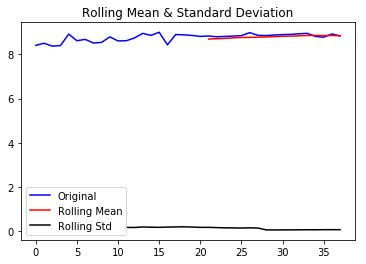

ADF Stastistic: -4.056444
p-value: 0.001142
The graph is stationery
Critical values:
	1%: -3.621 
	5%: -2.944 
	10%: -2.610 


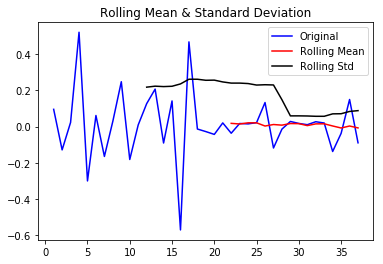

ADF Stastistic: -5.738505
p-value: 0.000001
The graph is stationery
Critical values:
	1%: -3.639 
	5%: -2.951 
	10%: -2.614 


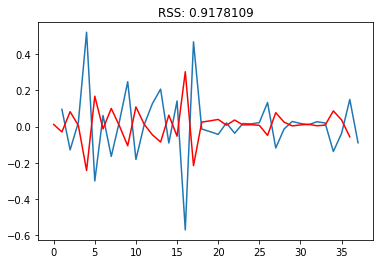

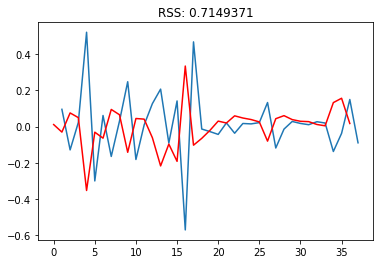

Sesamum Nandura
350


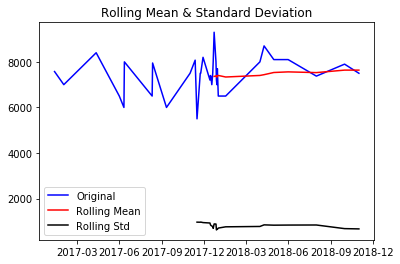

ADF Stastistic: -5.675902
p-value: 0.000001
The graph is stationery
Critical values:
	1%: -3.639 
	5%: -2.951 
	10%: -2.614 


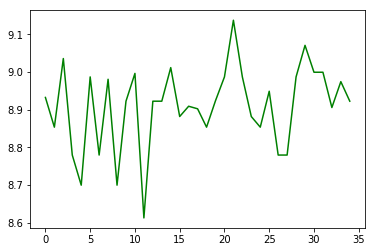

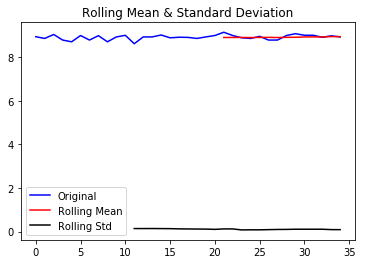

ADF Stastistic: -5.800557
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.639 
	5%: -2.951 
	10%: -2.614 


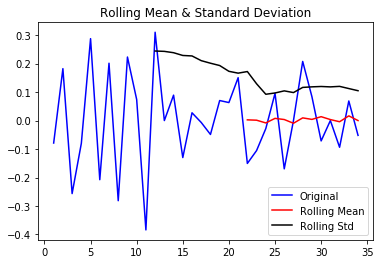

ADF Stastistic: -4.680735
p-value: 0.000091
The graph is stationery
Critical values:
	1%: -3.689 
	5%: -2.972 
	10%: -2.625 


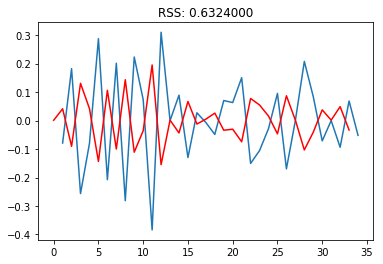

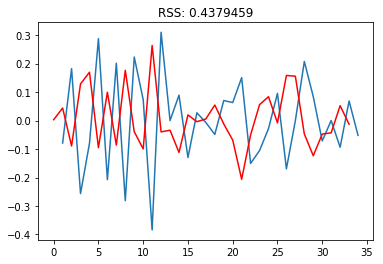

Sesamum Pachora
60
Sesamum Shegaon
100


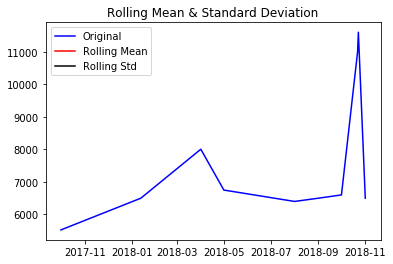

ADF Stastistic: 0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -6.045 
	5%: -3.929 
	10%: -2.987 


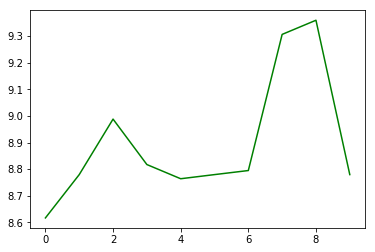

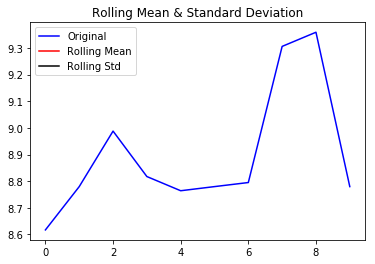

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -7.355 
	5%: -4.474 
	10%: -3.127 


C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


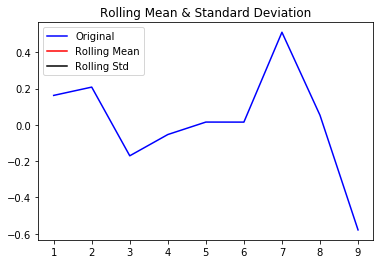

ADF Stastistic: -0.000000
p-value: 0.958532
The graph is non stationery
Critical values:
	1%: -6.045 
	5%: -3.929 
	10%: -2.987 


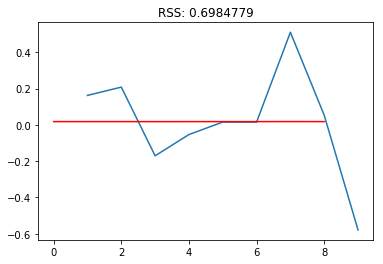

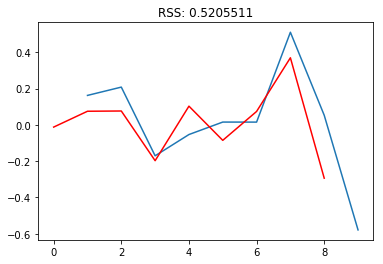

C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


LinAlgError: SVD did not converge

In [19]:
from statsmodels.tsa.stattools import adfuller
markets=list()
cropList=list()
for i in crops:  
    train=trainog
    train=train[(train['Minimum Price(Rs./Quintal)']!="NR")]
    traintemp=train[(train['crop/commodity']==i)]
    market=train['Market'].unique()
    print("For crop "+i)
    print(market)
    for j in market:
        train=traintemp[(traintemp['Market']==j)]
        print(i+" "+j)
        print(train.size)
        if(train.size>100):
            markets.append(j)
            cropList.append(i)
            data = train['Modal Price(Rs./Quintal)']
            Date1 = train['Date']
            train1 = train[['Date','Modal Price(Rs./Quintal)']]
            train2 = train1.set_index('Date')
            train2.sort_index(inplace=True)
            ts = train2['Modal Price(Rs./Quintal)']      
            test_stationarity(ts)
            ts_list=ts.tolist()
            ts_log = dragon.log(ts_list)
            plot.plot(ts_log,color="green")
            plot.show()
#             print(type(ts_log))
            test_stationarity(pd.Series(ts_log))
            ts_log_diff = ts_log - pd.Series(ts_log).shift()
            ts_log_diff.dropna(inplace=True)
            test_stationarity(ts_log_diff)
            # follow lag
            model = ARIMA(ts_log, order=(1,1,0))  
            results_ARIMA = model.fit(disp=-1)  
            plot.plot(ts_log_diff)
            plot.plot(results_ARIMA.fittedvalues, color='red')
            plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
            plot.show()
            # follow error
            model = ARIMA(ts_log, order=(0,1,1))  
            results_MA = model.fit(disp=-1)  
            plot.plot(ts_log_diff)
            plot.plot(results_MA.fittedvalues, color='red')
            plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
            plot.show()
            from statsmodels.tsa.arima_model import ARIMA
            model = ARIMA(ts_log, order=(2,1,0))
            results_ARIMA = model.fit(disp=-1)
            modelList.append(results_ARIMA)
#             print (str(results_ARIMA)+" "+i+" "+j)
#         else :
#             print("No data")


In [20]:
# print(markets)
# print(modelList)
# print(cropList)
for i in range(0,len(markets)):
    print("For crop "+cropList[i]+" market "+markets[i]+" prediction is "+str(dragon.exp(modelList[i].forecast(steps=12)[0])))

For crop Rice market Alibagh prediction is [ 7215.84350481  7223.66584998  7231.04271006  7240.96295222  7249.73906648
  7258.38719098  7267.44754346  7276.35484791  7285.24140518  7294.20196217
  7303.15054875  7312.10370145]
For crop Rice market Baramati prediction is [ 3262.29045622  3276.64863872  3292.20649568  3296.4488211   3306.45093573
  3315.80023541  3324.34466042  3333.49041339  3342.52790678  3351.54039008
  3360.63086183  3369.72793472]
For crop Rice market Barshi prediction is [ 3081.64902288  3118.89097291  3144.05507663  3166.48183901  3193.43665956
  3219.92719915  3245.69396849  3272.17489363  3298.95360192  3325.7865988
  3352.87187341  3380.21063555]
For crop Rice market Bhandara prediction is [ 3997.35582563  4018.75056085  3996.4559505   4006.29495908  4016.79186956
  4014.57811943  4018.52675781  4024.2781477   4026.75115139  4030.18740937
  4034.40896689  4037.86954159]
For crop Rice market Bhivandi prediction is [ 5897.87405272  5897.11621667  5896.1331391   5